In [1]:
from gensim.models.keyedvectors import KeyedVectors
import pandas as pd
import sys
import re
import csv
import numpy as np
import pylab as plt
import sklearn as skl
from sklearn.cluster import KMeans
from collections import defaultdict, Counter
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as dataset
import torch.optim as optim
import seaborn as sb
import json
import matplotlib.patches as patches

def flushPrint(d):
    sys.stdout.write('\r')
    sys.stdout.write(str(d))
    sys.stdout.flush()

ModuleNotFoundError: No module named 'gensim'

In [3]:
import re, urllib.request
import numpy as np
from bs4 import BeautifulSoup

In [10]:
blogAddress = 'http://colorlisa.com/'
html = urllib.request.urlopen(blogAddress).read()
soup = BeautifulSoup(html)
links = soup.findAll("strong")
len(links)#97

328

In [5]:
data=[]
for d in links:
    painting,painter=[i.strip() for i in d.findAll("h3")[0].text.split("\n") if i.strip()]
    painter=painter.split('by ')[1]
    colors=[i.string for i in d.findAll("div", {"class": "palette__color"})]
    if len(colors)==5:
        data.append([painter,painting,colors])

NameError: name 'links' is not defined

In [128]:
len(data)

73

In [1]:
data[0]

NameError: name 'data' is not defined

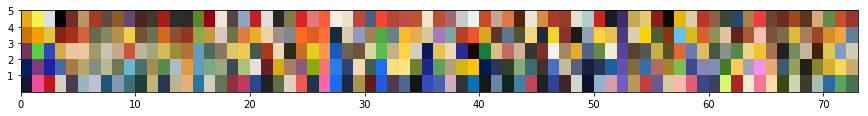

In [157]:
#HEX
fig = plt.figure(figsize=(15, 1.5),facecolor='white')
#
ax = fig.add_subplot(111)
for m in range(len(data)):
    colors=data[m][-1]
    for n in range(5):
        rect = patches.Rectangle((m,n),1,1,linewidth=1,edgecolor='none',facecolor=colors[n])
        ax.add_patch(rect)
plt.xlim(0,len(data))
plt.ylim(0,5)
plt.yticks(range(1,6))
plt.show()

In [158]:
cs=[i[-1] for i in data]

In [176]:
def hex2rgb(h):
    h=h.lstrip('#')
    return tuple(int(h[i:i+2], 16) for i in (0, 2, 4))

In [183]:
cs_rgb=[[hex2rgb(h) for h in j] for j in cs]

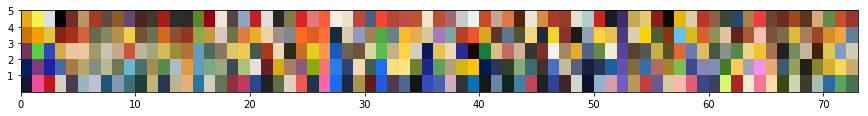

In [185]:
# GRB
fig = plt.figure(figsize=(15, 1.5),facecolor='white')
#
ax = fig.add_subplot(111)
for m in range(len(data)):
    colors=cs_rgb[m]
    for n in range(5):
        c=colors[n]
        r,g,b=np.array(c)/255
        rect = patches.Rectangle((m,n),1,1,linewidth=1,edgecolor='none',facecolor=(r,g,b))
        ax.add_patch(rect)
plt.xlim(0,len(data))
plt.ylim(0,5)
plt.yticks(range(1,6))
plt.show()

In [189]:
R,G,B=np.array([j for i in cs_rgb for j in i]).T
C=np.array([j for i in cs_rgb for j in i])/255

In [492]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [508]:
mpl.colors

<module 'matplotlib.colors' from '/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py'>

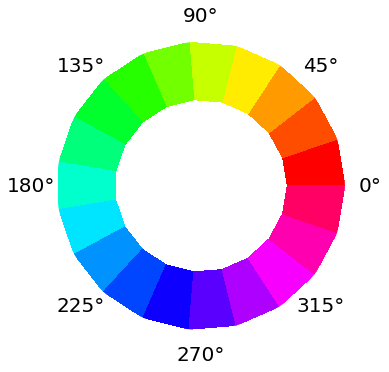

In [520]:
fg = plt.figure(figsize=(5,5))
ax = fg.add_axes([0.1,0.1,0.8,0.8], projection='polar')

cmap = plt.cm.hsv
# Define colormap normalization for 0 to 2*pi
norm = mpl.colors.Normalize(0, 2*np.pi)  

# Plot a color mesh on the polar plot
# with the color set by the angle

n = 20  #the number of secants for the mesh
t = np.linspace(0,2*np.pi,n)   #theta values
r = np.linspace(.6,1,2)        #radius values change 0.6 to 0 for full circle
rg, tg = np.meshgrid(r,t)      #create a r,theta meshgrid
c = tg                         #define color values as theta value
im = ax.pcolormesh(t, r, c.T,cmap=cmap, norm=norm)  #plot the colormesh on axis with colormap
ax.set_yticklabels([])                   #turn of radial tick labels (yticks)
ax.tick_params(pad=15,labelsize=20)      #cosmetic changes to tick labels
ax.spines['polar'].set_visible(False)

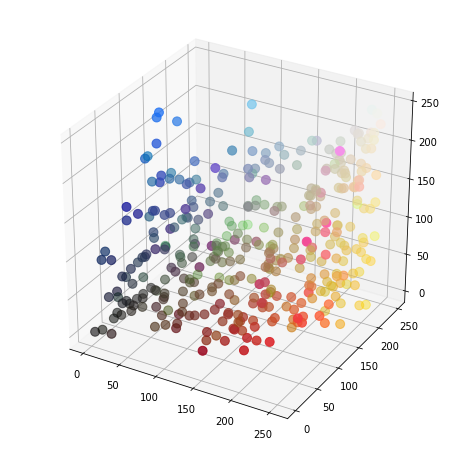

In [206]:
fig = plt.figure(figsize=(8, 8),facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(R, G, B, c=C, marker='o',s=80)

In [207]:
from sklearn.cluster import KMeans

In [412]:
kmeans = KMeans(n_clusters=4)
df=[j for i in cs_rgb for j in i]
ks = kmeans.fit(df)
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
centroids_norm = centroids/255
colormap=dict(zip([j for i in cs_rgb for j in i],[centroids_norm[i] for i in labels]))
groupmap=dict(zip([j for i in cs_rgb for j in i],labels))

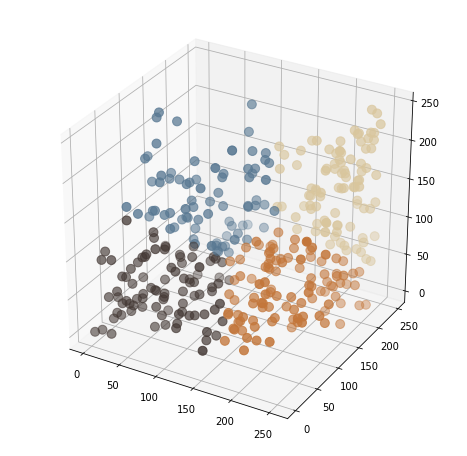

In [413]:
fig = plt.figure(figsize=(8, 8),facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(R, G, B, c=[centroids_norm[i] for i in labels], marker='o',s=80)

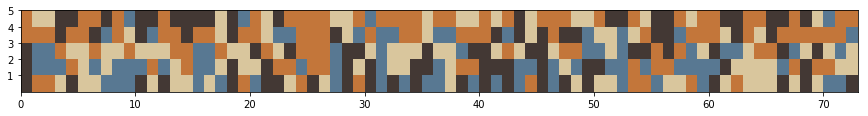

In [414]:
# GRB
fig = plt.figure(figsize=(15, 1.5),facecolor='white')
#
ax = fig.add_subplot(111)
for m in range(len(data)):
    colors=cs_rgb[m]
    for n in range(5):
        c=colors[n]
        nc = colormap[(c)]
        rect = patches.Rectangle((m,n),1,1,linewidth=1,edgecolor='none',facecolor=nc)
        ax.add_patch(rect)
plt.xlim(0,len(data))
plt.ylim(0,5)
plt.yticks(range(1,6))
plt.show()

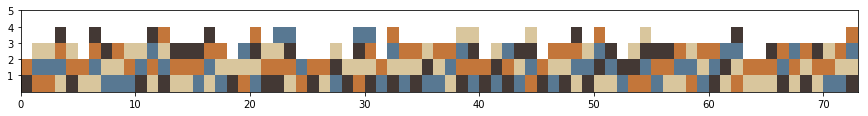

In [431]:
# GRB
fig = plt.figure(figsize=(15, 1.5),facecolor='white')
#
ax = fig.add_subplot(111)
for m in range(len(data)):
    colors=cs_rgb[m]
    n_colors=list(Counter([tuple(colormap[c]) for c in colors]).keys())
    for n in range(len(n_colors)):
        nc=n_colors[n]
        rect = patches.Rectangle((m,n),1,1,linewidth=1,edgecolor='none',facecolor=nc)
        ax.add_patch(rect)
plt.xlim(0,len(data))
plt.ylim(0,5)
plt.yticks(range(1,6))
plt.show()

In [436]:
nd=[list(Counter([groupmap[c] for c in colors]).keys()) for colors in cs_rgb]

In [439]:
import itertools
e=defaultdict(lambda:0)
for v in nd:
    for i,j in itertools.combinations(sorted(v), 2):
        e[(i,j)]+=1

In [440]:
e

defaultdict(<function __main__.<lambda>()>,
            {(1, 3): 39,
             (0, 2): 44,
             (0, 3): 42,
             (2, 3): 50,
             (0, 1): 34,
             (1, 2): 41})

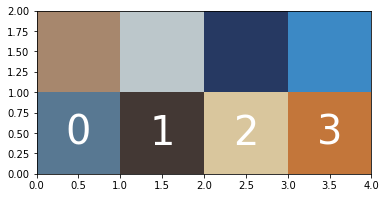

In [442]:
# testing complementrary color
fig = plt.figure(figsize=(6, 3),facecolor='white')
ax = fig.add_subplot(111)
for n in range(len(centroids)):
    # original color
    rect = patches.Rectangle((n,0),1,1,linewidth=1,edgecolor='none',facecolor=centroids[n]/255)
    ax.add_patch(rect)
    # complementary color
    rect = patches.Rectangle((n,1),1,1,linewidth=1,edgecolor='none',facecolor=1-centroids[n]/255)
    ax.add_patch(rect)   
    plt.text(n+.5,.5,str(n),size=40,color='white',ha='center',va='center')
plt.xlim(0,len(centroids))
plt.ylim(0,2)
plt.show()
#

In [407]:
from collections import defaultdict, Counter
import networkx as nx
import numpy as np
import pylab as plt
import matplotlib as mpl
import random
import torch
import torch.nn as nn
from copy import deepcopy
from torch import optim
from scipy import stats
import torch.nn.functional as F
from torch.autograd import Variable
from scipy.interpolate import UnivariateSpline
from gensim.models import Word2Vec
#for word2vec:
#https://towardsdatascience.com/implementing-word2vec-in-pytorch-skip-gram-model-e6bae040d2fb
#for transD:
#https://github.com/jimmywangheng/knowledge_representation_pytorch/
#for RNN:
# https://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/

def oneHot(entity_idx,entity_size):
    x = torch.zeros(entity_size).float()
    x[entity_idx] = 1.0
    return x

In [408]:
trainData=[[groupmap[c] for c in j] for j in cs_rgb]
sentences= [[str(i) for i in j] for j in trainData]
model = Word2Vec(sentences,size=2, min_count=1,hs=1,iter=10000)
W_in=dict(zip(list(model.wv.vocab),model.wv.syn0))
W_out=dict(zip(list(model.wv.vocab),model.syn1))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `syn1` (Attribute will be removed in 4.0.0, use self.trainables.syn1 instead).
  """


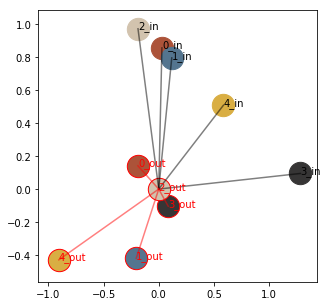

In [409]:
fig = plt.figure(figsize=(5, 5),facecolor='white')
ax = fig.add_subplot(111)
for i in W_in:
    x,y=W_in[i]
    plt.scatter(x,y,s=500,color=centroids_norm[int(i)])
    plt.text(x,y,i+'_in')
    plt.plot([0,x],[0,y],'k-',alpha=0.5)
for i in W_out:
    x,y=W_out[i]
    plt.scatter(x,y,s=500,color=centroids_norm[int(i)],edgecolor='r')
    plt.text(x,y,i+'_out',color='r')
    plt.plot([0,x],[0,y],'r-',alpha=0.5)

In [410]:
[(i,model.predict_output_word([i])[0][0]) for i in model.wv.vocab]

[('3', '0'), ('0', '4'), ('4', '0'), ('1', '4'), ('2', '0')]

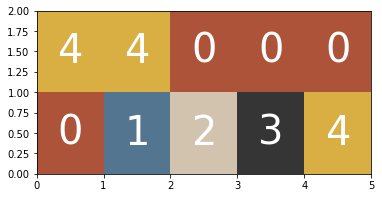

In [411]:
# testing complementrary color
fig = plt.figure(figsize=(6, 3),facecolor='white')
ax = fig.add_subplot(111)
for n in range(len(centroids)):
    # original color
    rect = patches.Rectangle((n,0),1,1,linewidth=1,edgecolor='none',facecolor=centroids[n]/255)
    ax.add_patch(rect)
    plt.text(n+.5,.5,str(n),size=40,color='white',ha='center',va='center')
    # complementary color predicted by machine 
    output_word=returnNext(str(n))
    rect = patches.Rectangle((n,1),1,1,linewidth=1,edgecolor='none',facecolor=centroids[int(output_word)]/255)
    ax.add_patch(rect)   
    plt.text(n+.5,1.5,output_word,size=40,color='white',ha='center',va='center')
plt.xlim(0,len(centroids))
plt.ylim(0,2)
plt.show()
#

In [387]:
def returnNext(i):
    sort=list(zip(*model.predict_output_word(i)))[0]
    top2=sort[:2]
    a,b=top2
    if a!=i:
        return a
    else:
        return b

9